In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from types import SimpleNamespace
from sklearn.preprocessing import MinMaxScaler
from utils import *
from IPython.display import display, Markdown, HTML 
import markdown2
from scipy import stats

pd.set_option("display.max_rows", 100)


def order_score(score):
    score = score[['participant', 'experiment', 'total']]
    df_demo = get_demographics_data()
    df_demo = df_demo[['participant', 0, 1, 2, 3]]

    x1 = df_demo.rename(columns={0 : 'experiment'})[['participant', 'experiment']]
    x2 = df_demo.rename(columns={1 : 'experiment'})[['participant', 'experiment']]
    x3 = df_demo.rename(columns={2 : 'experiment'})[['participant', 'experiment']]
    x4 = df_demo.rename(columns={3 : 'experiment'})[['participant', 'experiment']]

    p1 = pd.merge(score, x1, on=['participant', 'experiment'])[['participant', 'total']].rename(columns={'total': 0})
    p2 = pd.merge(score, x2, on=['participant', 'experiment'])[['participant', 'total']].rename(columns={'total': 1})
    p3 = pd.merge(score, x3, on=['participant', 'experiment'])[['participant', 'total']].rename(columns={'total': 2})
    p4 = pd.merge(score, x4, on=['participant', 'experiment'])[['participant', 'total']].rename(columns={'total': 3})

    return p1.merge(p2, on='participant').merge(p3, on='participant').merge(p4, on='participant')

def order_score2(score):
    score = score[['participant', 'experiment', 'total']].copy()
    score['difficulty'] = score['experiment'].str[-1]
    score = score.rename(columns={'total':'score'})
    df_demo = get_demographics_data()
    df_demo = df_demo[['participant', 0, 1, 2, 3]]
    df_demo = df_demo.melt(id_vars='participant', var_name='time', value_name='experiment')
    return pd.merge(score, df_demo, on=['participant', 'experiment'])

    
    

In [2]:
fp = Statistics.compute_failure_proportion_statistics()
fl = Statistics.compute_failure_length_statistics()
fc = Statistics.compute_failure_count_statistics()
scores = dict(FP=fp, FL=fl, FC=fc)

In [4]:
for name, score in scores.items():
    # print(f"========================= {name} ==============================")
    score = score[['participant', 'experiment', 'fuel', 'system', 'tracking', 'total']].copy()
    score['difficulty'] = score['experiment'].str[-1]
    score = score.rename(columns={'total':'score'})
    df = score
    df['score'] = df['score'].astype(np.float32)
    df['participant'] = df['participant'].astype('category')
    df['difficulty'] = df['difficulty'].astype('category')
    #dfA, dfB = df[df['difficulty'] == "A"].copy(), df[df['difficulty'] == "B"].copy()
    
    sA, saA = df[df['experiment'] == 'icuA'].sort_values('participant').reset_index(drop=True), df[df['experiment'] == 'icuaA'].sort_values('participant').reset_index(drop=True)
    sB, saB = df[df['experiment'] == 'icuB'].sort_values('participant').reset_index(drop=True), df[df['experiment'] == 'icuaB'].sort_values('participant').reset_index(drop=True)
    
    

    print(sA)
    
    
    
    
    """
    ttestA = stats.ttest_rel(sA['score'], saA['score'], alternative='greater')
    ttestB = stats.ttest_rel(sB['score'], saB['score'], alternative='greater')
    print(f"A: {name} & {ttestA.statistic:.3f} & {ttestA.pvalue:.3f} \\\\ \hline ")
    print(f"B: {name} & {ttestB.statistic:.3f} & {ttestB.pvalue:.3f} \\\\ \hline ")
    
    
    wilcoxonA = stats.wilcoxon(sA['score'], saA['score'], alternative='greater')
    wilcoxonB = stats.wilcoxon(sB['score'], saB['score'], alternative='greater')
    print(f"A: {name} & {wilcoxonA.statistic:.3f} & {wilcoxonA.pvalue:.3f} \\\\ \hline ")
    print(f"B: {name} & {wilcoxonB.statistic:.3f} & {wilcoxonB.pvalue:.3f} \\\\ \hline ")
        
    print()
    print(f"improvement count: {((sA['score'] - saA['score']) > 0).sum()}/{sA.shape[0]}")
    print(f"improvement count: {((sB['score'] - saB['score']) > 0).sum()}/{sB.shape[0]}")
    
    
   
    
    
    vc = {'difficulty': '0 + C(difficulty)'} # C(difficulty) treats difficulty as a categorical variable
    md = sm.MixedLM.from_formula('score ~ time', vc_formula=vc, re_formula='0', groups='participant', data=df)
    mdf = md.fit()
    print(f"{name} & {mdf.params['time']:.3f} & {mdf.pvalues['time']:.3f} \\\\ \hline ")
    
    
    
    """
    

   participant experiment      fuel    system  tracking     score difficulty
0          P01       icuA  0.025906  0.144143  0.000000  0.170048          A
1          P02       icuA  0.764953  0.235492  0.000000  0.764953          A
2          P04       icuA  0.000000  0.345895  0.013411  0.348942          A
3          P05       icuA  0.613030  0.219026  0.000000  0.635587          A
4          P06       icuA  0.019173  0.093507  0.000000  0.112680          A
5          P07       icuA  0.089291  0.118164  0.000582  0.191217          A
6          P08       icuA  0.477692  0.122348  0.000000  0.537195          A
7          P09       icuA  0.109804  0.136970  0.000000  0.220562          A
8          P10       icuA  0.000000  0.177597  0.000000  0.177597          A
9          P11       icuA  0.107955  0.273346  0.000000  0.357678          A
10         P12       icuA  0.000000  0.217537  0.000000  0.217537          A
11         P13       icuA  0.000000  0.126116  0.000000  0.126116          A

/home/ben/anaconda3/envs/icua/lib/python3.10/site-packages/scipy/stats/_morestats.py:4088: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


FP & 826.000 & 0.003 \\ \hline 


/home/ben/anaconda3/envs/icua/lib/python3.10/site-packages/scipy/stats/_morestats.py:4088: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


FL & 871.000 & 0.001 \\ \hline 
FC & 291.000 & 0.978 \\ \hline 


/home/ben/anaconda3/envs/icua/lib/python3.10/site-packages/scipy/stats/_morestats.py:4088: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


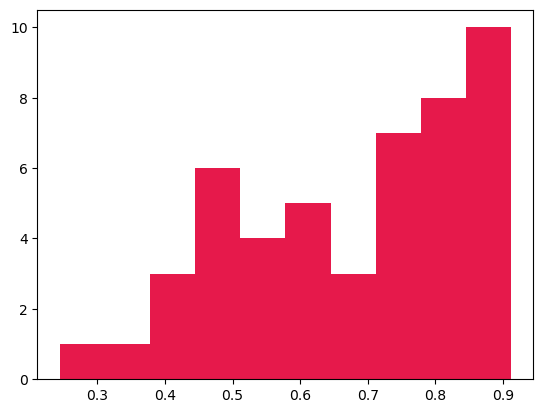

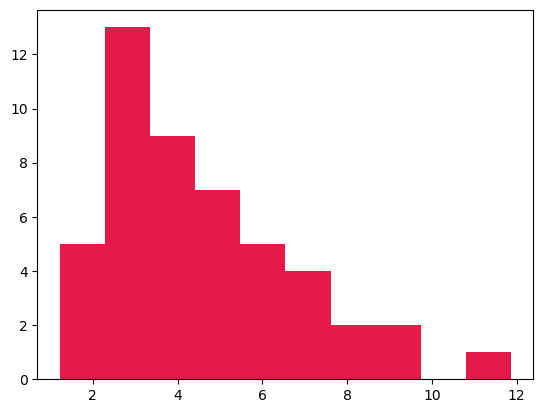

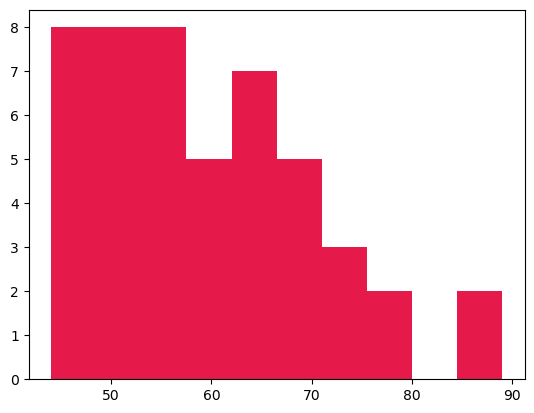

In [72]:
for name, score in scores.items():
    # print(f"========================= {name} ==============================")
    df = order_score2(score)
    df['time'] = df['time'].astype(np.float32)
    df['score'] = df['score'].astype(np.float32)
    df['participant'] = df['participant'].astype('category')
    df['difficulty'] = df['difficulty'].astype('category')
    _df = df
    _dfA, _dfB = df[df['difficulty'] == "A"].copy(), df[df['difficulty'] == "B"].copy()
    
    
    plt.figure()
    plt.hist(df[df['difficulty'] == "B"]['score'])
    
    def time_sort(df):
        def _gen(df):
            df = df.groupby('participant')
            for par, group in df:
                group = group.sort_values('time')
                #print(group)
                sdif = group['score'].iloc[0] - group['score'].iloc[1]
                tdif = group['time'].iloc[1] - group['time'].iloc[0]
                yield (par, tdif, sdif, group['score'].iloc[0], group['score'].iloc[1], group['experiment'].iloc[0], group['experiment'].iloc[1])
        return pd.DataFrame(_gen(df), columns=["participant", "time_dif", "score_dif", "score0", "score1", "experiment0", "experiment1"])

    
    dfA = time_sort(df[df['difficulty'] == "B"][['participant', 'experiment', 'score', 'time']])
    dfB = time_sort(df[df['difficulty'] == "A"][['participant', 'experiment', 'score', 'time']])

    df = pd.concat([dfA, dfB], ignore_index=True)  
    from scipy import stats
#     print("ttest A", stats.ttest_rel(dfA['score0'], dfA['score1'], alternative='greater'))
#     print("ttest B", stats.ttest_rel(dfB['score0'], dfB['score1'], alternative='greater'))
#     print("ttest  ", stats.ttest_rel(df['score0'], df['score1'], alternative='greater'))
    
#     print("wilcoxon A: ", stats.wilcoxon(dfA['score0'], dfA['score1'], alternative='greater'))
#     print("wilcoxon B: ", stats.wilcoxon(dfB['score0'], dfB['score1'], alternative='greater'))
#     print("wilcoxon : ", stats.wilcoxon(df['score0'], df['score1'], alternative='greater'))
   
    #print(f"A &  {(dfA['score_dif'] > 0).sum()}/{dfA.shape[0]} & ")
    #print(f"B &  {(dfB['score_dif'] > 0).sum()}/{dfB.shape[0]} & ")
    # print(f"Participant improvement count: {(df['score_dif'] > 0).sum()}/{df.shape[0]}")
    
    # for latex
    #ttest = stats.ttest_rel(df['score0'], df['score1'], alternative='greater')
    #print(f"{name} & {ttest.statistic:.3f} & {ttest.pvalue:.3f} \\\\ \hline ")
    wilcoxon = stats.wilcoxon(df['score0'], df['score1'], alternative='greater')
    print(f"{name} & {wilcoxon.statistic:.3f} & {wilcoxon.pvalue:.3f} \\\\ \hline ")
    

In [67]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib

cmap = matplotlib.colormaps['gist_rainbow']

# it looks like rather than correcting using the mean value, we can do nested grouping - see bottom of:
# TODO https://www.statsmodels.org/dev/generated/statsmodels.formula.api.mixedlm.html

# do simple linear regression on corrected scores
for name, score in scores.items():
    #print(f"========================= {name} ==============================")
    
    
    df = order_score2(score)
    df['time'] = df['time'].astype(np.float32)
    df['score'] = df['score'].astype(np.float32)
    df['participant'] = df['participant'].astype('category')
    df['difficulty'] = df['difficulty'].astype('category')
    
    #print(df['score']) # normalise the scores
    df['score'] = (df['score'] - df['score'].min()) / (df['score'].max() - df['score'].min())
    
    
    

    md = sm.MixedLM.from_formula('score ~ time', groups='participant', data=df)
    mdf = md.fit()
    # print(mdf.summary())
    
    #print(f"{name} & {mdf.params['time']} & {mdf.pvalues['time']} \\\\ \hline ")


    vc = {'difficulty': '0 + C(difficulty)'} # C(difficulty) treats difficulty as a categorical variable
    md = sm.MixedLM.from_formula('score ~ time', vc_formula=vc, re_formula='0', groups='participant', data=df)
    mdf = md.fit()
    print(f"{name} & {mdf.params['time']:.3f} & {mdf.pvalues['time']:.3f} \\\\ \hline ")
    #print(mdf.summary())
    
    
    

FP & -0.037 & 0.005 \\ \hline 
FL & -0.027 & 0.010 \\ \hline 
FC & 0.010 & 0.159 \\ \hline 


/home/ben/anaconda3/envs/icua/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/ben/anaconda3/envs/icua/lib/python3.10/site-packages/statsmodels/regression/mixed_linear_model.py:2201: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/ben/anaconda3/envs/icua/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/ben/anaconda3/envs/icua/lib/python3.10/site-packages/statsmodels/regression/mixed_linear_model.py:2201: ConvergenceWarning: Retrying MixedLM optimization with cg
  warnings.warn(
/home/ben/anaconda3/envs/icua/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization fai

In [ ]:
mdf = md.fit()
df['FixedEffectPrediction'] = mdf.predict(df) # fixed effects predictions

#print(mdf.random_effects)
# Plot the fixed effects predictions


fig, ax = plt.subplots()
plt.plot(df['time'], df['FixedEffectPrediction'], label='Fixed Effects Prediction')
# Plot random effects for each participant
for participant in mdf.random_effects:
    participant_data = df[df['participant'] == participant].sort_values('time')
    random_effect = mdf.random_effects[participant]
    print(random_effect)

    color = participant_data['participant'].cat.codes[0].item()
    color = 'red'

    # plot scores
    ax.plot(participant_data['time'], participant_data['score'], marker='o', label=participant, c=color)

    break

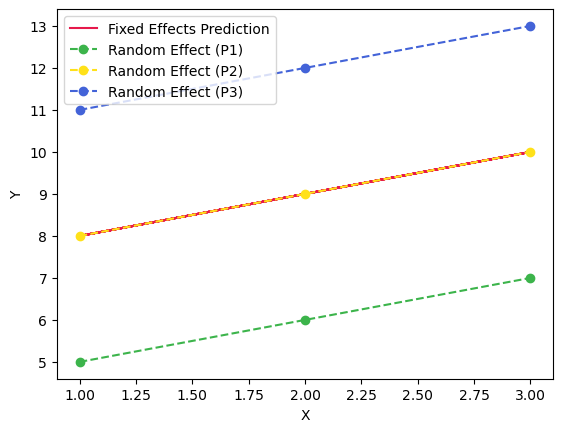

In [4]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import numpy as np

# Create a sample DataFrame
data = {'Participant': ['P1', 'P1', 'P1', 'P2', 'P2', 'P2', 'P3', 'P3', 'P3'],
        'X': [1, 2, 3, 1, 2, 3, 1, 2, 3],
        'Y': [5, 6, 7, 8, 9, 10, 11, 12, 13]}
df = pd.DataFrame(data)

# Fit a mixed linear model
model = smf.mixedlm("Y ~ X", df, groups=df['Participant'])
result = model.fit()

# Extract fixed effects predictions
df['FixedEffectPrediction'] = result.predict(df)

# Extract random effects
random_effects = result.random_effects
#print(random_effects)
#print(df)

# Plot the fixed effects predictions
plt.plot(df['X'], df['FixedEffectPrediction'], label='Fixed Effects Prediction')

# Plot random effects for each participant
for participant in random_effects:
    participant_data = df[df['Participant'] == participant]
    random_effect = random_effects[participant]
    plt.plot(participant_data['X'], participant_data['FixedEffectPrediction'] + random_effect.item(),
             marker='o', linestyle='--', label=f'Random Effect ({participant})')

# Set plot labels and legend
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()

# Display the plot
plt.show()


=================================== FP =======================================
                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.060
Model:                            OLS   Adj. R-squared:                  0.044
Method:                 Least Squares   F-statistic:                     3.699
Date:                Wed, 19 Jul 2023   Prob (F-statistic):             0.0594
Time:                        16:54:48   Log-Likelihood:                 12.411
No. Observations:                  60   AIC:                            -20.82
Df Residuals:                      58   BIC:                            -16.63
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------

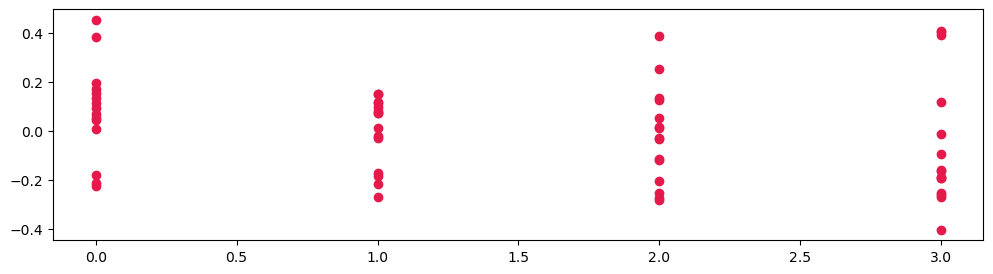

In [6]:
# do simple linear regression on corrected scores
# NOTE: this leads to bad p-values... FP and FL have a negative slope indicating improvement (but pvalues are too high)

import statsmodels.api as sm
for name, score in scores.items():
    #score = get_ordered_scores(score).score
    score = get_ordered_scores(score).score_corrected
    
    ncols = score.select_dtypes(include='number').columns
    df = score[ncols].melt(var_name='X', value_name='Y')
    x, y = df[['X']].astype(float), df['Y']
    x = sm.add_constant(x)
    model = sm.OLS(y, x).fit()
    print(f"=================================== {name} =======================================")
    print(model.summary(), "\n")
    plt.figure(figsize=(12,3))
    plt.scatter(x.to_numpy()[:,1], y)
    break

False

In [42]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
data = sm.datasets.get_rdataset('dietox', 'geepack').data

print(data)

md = smf.mixedlm("Weight ~ Time", data, groups=data["Pig"], re_formula="~Time")
mdf = md.fit(method=["lbfgs"])
print(mdf.summary())

      Pig     Evit     Cu  Litter  Start     Weight        Feed  Time
0    4601  Evit000  Cu000       1   26.5   26.50000         NaN     1
1    4601  Evit000  Cu000       1   26.5   27.59999    5.200005     2
2    4601  Evit000  Cu000       1   26.5   36.50000   17.600000     3
3    4601  Evit000  Cu000       1   26.5   40.29999   28.500000     4
4    4601  Evit000  Cu000       1   26.5   49.09998   45.200001     5
..    ...      ...    ...     ...    ...        ...         ...   ...
856  8442  Evit000  Cu175      24   25.7   73.19995   83.800003     8
857  8442  Evit000  Cu175      24   25.7   81.69995   99.800003     9
858  8442  Evit000  Cu175      24   25.7   90.29999  115.200001    10
859  8442  Evit000  Cu175      24   25.7   96.00000  133.200001    11
860  8442  Evit000  Cu175      24   25.7  103.50000  151.400002    12

[861 rows x 8 columns]
           Mixed Linear Model Regression Results
Model:             MixedLM  Dependent Variable:  Weight    
No. Observations:  861     

In [91]:
import numpy as np
from scipy.stats import ttest_rel, ttest_ind

# Set the random seed for reproducibility
np.random.seed(42)

# Generate 'before' data from a normal distribution with mean 10 and standard deviation 2
before = np.random.normal(loc=12, scale=2, size=1000)

# Generate 'after' data from a normal distribution with mean 12 and standard deviation 2
after = np.random.normal(loc=12, scale=2, size=1000)

# Perform paired t-test
t_statistic, p_value = ttest_ind(before, after)

# Display the results
print("Paired t-test results:")
print("T-statistic:", t_statistic)
print("P-value:", p_value)

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("The difference in means is statistically significant at alpha =", alpha)
else:
    print("The difference in means is not statistically significant at alpha =", alpha)


Paired t-test results:
T-statistic: -1.1652114959269935
P-value: 0.24407248412457094
The difference in means is not statistically significant at alpha = 0.05


/home/ben/anaconda3/envs/icua/lib/python3.10/site-packages/statsmodels/regression/mixed_linear_model.py:1635: UserWarning: Random effects covariance is singular
  warnings.warn(msg)
/home/ben/anaconda3/envs/icua/lib/python3.10/site-packages/statsmodels/regression/mixed_linear_model.py:1635: UserWarning: Random effects covariance is singular
  warnings.warn(msg)
/home/ben/anaconda3/envs/icua/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/ben/anaconda3/envs/icua/lib/python3.10/site-packages/statsmodels/regression/mixed_linear_model.py:2201: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/ben/anaconda3/envs/icua/lib/python3.10/site-packages/statsmodels/regression/mixed_linear_model.py:1635: UserWarning: Random effects covariance is singular
  warnings.warn(msg)
/home/ben/anaconda3/envs/

         Mixed Linear Model Regression Results
Model:             MixedLM Dependent Variable: score    
No. Observations:  200     Method:             REML     
No. Groups:        50      Scale:              26.7870  
Min. group size:   4       Log-Likelihood:     -611.8635
Max. group size:   4       Converged:          Yes      
Mean group size:   4.0                                  
--------------------------------------------------------
                Coef. Std.Err.   z   P>|z| [0.025 0.975]
--------------------------------------------------------
Intercept       4.199    0.612 6.857 0.000  2.999  5.399
time            0.256    0.327 0.783 0.434 -0.385  0.898
participant Var 0.000                                   

          Mixed Linear Model Regression Results
Model:              MixedLM Dependent Variable: score    
No. Observations:   200     Method:             REML     
No. Groups:         50      Scale:              1.2436   
Min. group size:    4       Log-Likelihood:   

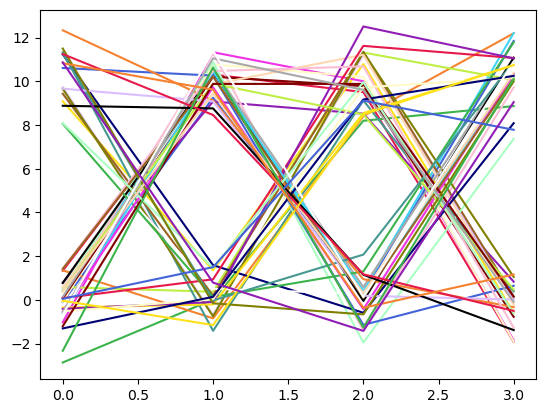

In [40]:

def order_score2(score):
    score = score[['participant', 'experiment', 'total']].copy()
    score['difficulty'] = score['experiment'].str[-1]
    score = score.rename(columns={'total':'score'})
    df_demo = get_demographics_data()
    df_demo = df_demo[['participant', 0, 1, 2, 3]]
    df_demo = df_demo.melt(id_vars='participant', var_name='time', value_name='experiment')
    return pd.merge(score, df_demo, on=['participant', 'experiment'])

    
N = 50
M = 4


d = np.empty((N, M), dtype=int)
for i in range(N):
    d[i] = np.random.permutation(M)
d = np.concatenate([np.arange(d.shape[0])[:,np.newaxis], d], axis=1)
d = pd.DataFrame(data=d, columns=["participant",0,1,2,3]).melt(id_vars='participant', var_name='time', value_name='experiment')


score = np.random.normal(0,1,d.shape[0])
d['difficulty'] = d['experiment'] > 1
score[d['difficulty']] += 10
d['difficulty'] = d['difficulty'].astype(int)
d['score'] = score

for p,group in d.groupby('participant'):
    group = group.sort_values('time')
    plt.plot(group['time'], group['score'])

df = d.copy()
df['time'] = df['time'].astype(np.float32)
df['score'] = df['score'].astype(np.float32)
df['participant'] = df['participant'].astype('category')
df['difficulty'] = df['difficulty'].astype('category')

# adjust so that score goes down with time (this is a test)
df['score'] = df['score'] - (df['time'] * 0.3)



md = sm.MixedLM.from_formula('score ~ time', groups='participant', data=df)
mdf = md.fit()
print(mdf.summary())


vc = {'difficulty': '0 + C(difficulty)'} # C(difficulty) treats difficulty as a categorical variable
md = sm.MixedLM.from_formula('score ~ time', vc_formula=vc, re_formula='0', groups='participant', data=df)
mdf = md.fit()
print(mdf.summary())
   

